<a href="https://colab.research.google.com/github/smlacava/score-level-fusion/blob/main/DF_Fusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Fusion modules

In [ ]:
from pyparsing.results import ParseResults
import numpy as np
from sklearn import svm
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import ComplementNB
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import r_regression, mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV


class accuracy_based_fusion():
  """
  This method combines the scores obtained from single deep fake detection
  systems into a predicted label for each sample, according to the performance
  of the single systems


  Method :fit:
  Input:
    x is the matrix containing the scores representing the outcomes of each deep
            fake detection system, one per column (samples * systems)
    weights is the row list of weights associated with the deepfake detection
            systems (e.g., the list of their accuracies)


  Method :predict:
  Input:
      scores is the matrix of scores associated with the deepfake detection
            systems (samples x systems)

  Output:
    results is the list containing the class labels obtained by the fusion
  """
  def __init__(self, weights=[1]):
    self.fit(weights)

  def fit(self, weights, y=None):
    weights = [max([0, w]) for w in weights]
    aux = sum(weights)
    self.weights = [w/aux for w in weights]
    print(self.weights)

  def predict_proba(self, x):
    scores = np.array(x)
    r, c = np.shape(scores)
    results = [0]*r
    for idx in range(r):
      results[idx] = sum([scores[idx, j]*self.weights[j] for j in range(c)])
    return results

  def predict(self, x, thr=0.5):
    results = self.predict_proba(x)
    for idx in range(len(results)):
      if results[idx] >= thr:
        results[idx] = 1
      else:
        results[idx] = 0
    return results




class corr_based_fusion():
  """
  This method combines the scores obtained from single deep fake detection
  systems into a predicted label for each sample, according to the Pearson
  correlation between the scores predicted by each system and the real classes


  Method :fit:
  Input:
    x is the matrix containing the scores representing the outcomes of each deep
            fake detection system, one per column (samples * systems)
    scores is the matrix of scores associated with the deepfake detection
            systems (samples x systems)


  Method :predict:
  Input:
    x is the matrix containing the scores representing the outcomes of each deep
            fake detection system, one per column (samples * systems)

  Output:
    results is the list containing the class labels obtained by the fusion
  """
  def __init__(self):
    self.model = accuracy_based_fusion()

  def fit(self, x, y):
    self.model.fit(r_regression(x, y))

  def predict(self, x, thr=0.5):
    return self.model.predict(x, thr)

  def predict_proba(self, x):
    return self.model.predict_proba(x)


class mutual_information_based_fusion():
  """
  This method combines the scores obtained from single deep fake detection
  systems into a predicted label for each sample, according to the mutual
  information between the scores predicted by each system and the real classes


  Method :fit:
  Input:
    x is the matrix containing the scores representing the outcomes of each deep
            fake detection system, one per column (samples * systems)
    scores is the matrix of scores associated with the deepfake detection
            systems (samples x systems)


  Method :predict:
  Input:
    x is the matrix containing the scores representing the outcomes of each deep
            fake detection system, one per column (samples * systems)

  Output:
    results is the list containing the class labels obtained by the fusion
  """
  def __init__(self):
    self.model = accuracy_based_fusion()

  def fit(self, x, y):
    self.model.fit(mutual_info_regression(x, y).tolist())

  def predict(self, x, thr=0.5):
    return self.model.predict(x, thr)

  def predict_proba(self, x):
    return self.model.predict_proba(x)


class average_rule():
  """
  This method combines the scores obtained from single deep fake detection
  systems into a predicted label for each sample, according to the average rule

  Method :fit:
  Input:
    x is the matrix containing the scores representing the outcomes of each deep
            fake detection system, one per column (samples * systems)
    scores is the matrix of scores associated with the deepfake detection
            systems (samples x systems)


  Method :predict:
  Input:
    x is the matrix containing the scores representing the outcomes of each deep
            fake detection system, one per column (samples * systems)

  Output:
    results is the list containing the class labels obtained by the fusion
  """
  def __init__(self):
    pass

  def fit(self, x, y):
    pass

  def predict(self, x, thr=0.5):
    labels = []
    scores = self.predict_probabilities(x)
    for idx in range(len(scores)):
      labels.append(int(scores[idx] >= thr))
    return labels

  def predict_probabilities(self, x):
    r, c = np.shape(x)
    scores = [0]*r
    for idx in range(r):
      scores[idx] = np.mean(x[idx])
    return scores


class bayes_rule():
  """
  This method combines the scores obtained from single deep fake detection
  systems into a predicted label for each sample, according to the Bayesian rule

  Method :fit:
  Input:
    x is the matrix containing the scores representing the outcomes of each deep
            fake detection system, one per column (samples * systems)
    scores is the matrix of scores associated with the deepfake detection
            systems (samples x systems)


  Method :predict:
  Input:
    x is the matrix containing the scores representing the outcomes of each deep
            fake detection system, one per column (samples * systems)

  Output:
    results is the list containing the class labels obtained by the fusion
  """
  def __init__(self):
    ParseResults

  def fit(self, x, y):
    pass

  def predict(self, x, thr=0.5):
    labels = []
    scores = self.predict_probabilities(x)
    for idx in range(len(scores)):
      labels.append(int(scores[idx] >= thr))
    return labels

  def predict_probabilities(self, x):
    r, c = np.shape(x)
    scores = [0]*r
    for idx in range(r):
      prob = np.prod(x[idx])
      inv_prob = np.prod([1-el for el in x[idx]])
      scores[idx]=prob/(prob+inv_prob)
    return scores



class prod_rule():
  """
  This method combines the scores obtained from single deep fake detection
  systems into a predicted label for each sample, according to the product rule

  Method :fit:
  Input:
    x is the matrix containing the scores representing the outcomes of each deep
            fake detection system, one per column (samples * systems)
    scores is the matrix of scores associated with the deepfake detection
            systems (samples x systems)


  Method :predict:
  Input:
    x is the matrix containing the scores representing the outcomes of each deep
            fake detection system, one per column (samples * systems)

  Output:
    results is the list containing the class labels obtained by the fusion
  """
  def __init__(self):
    pass

  def fit(self, x, y):
    pass

  def predict(self, x, thr=0.5):
    labels = []
    scores = self.predict_probabilities(x)
    for idx in range(len(scores)):
      labels.append(int(scores[idx] >= thr))
    return labels

  def predict_probabilities(self, x):
    r, c = np.shape(x)
    scores = [0]*r
    for idx in range(r):
      scores[idx] = np.prod(x[idx])**(1/c)
    return scores


class max_rule():
  """
  This method combines the scores obtained from single deep fake detection
  systems into a predicted label for each sample, according to the max rule

  Method :fit:
  Input:
    x is the matrix containing the scores representing the outcomes of each deep
            fake detection system, one per column (samples * systems)
    scores is the matrix of scores associated with the deepfake detection
            systems (samples x systems)


  Method :predict:
  Input:
    x is the matrix containing the scores representing the outcomes of each deep
            fake detection system, one per column (samples * systems)

  Output:
    results is the list containing the class labels obtained by the fusion
  """
  def __init__(self):
    pass

  def fit(self, x, y):
    pass

  def predict(self, x, thr=0.5):
    labels = []
    scores = self.predict_probabilities(x)
    for idx in range(len(scores)):
      labels.append(int(scores[idx] >= thr))
    return labels

  def predict_probabilities(self, x):
    r, c = np.shape(x)
    scores = [0]*r
    for idx in range(r):
      scores[idx] = np.max(x[idx])
    return scores


class min_rule():
  """
  This method combines the scores obtained from single deep fake detection
  systems into a predicted label for each sample, according to the min rule

  Method :fit:
  Input:
    x is the matrix containing the scores representing the outcomes of each deep
            fake detection system, one per column (samples * systems)
    scores is the matrix of scores associated with the deepfake detection
            systems (samples x systems)


  Method :predict:
  Input:
    x is the matrix containing the scores representing the outcomes of each deep
            fake detection system, one per column (samples * systems)

  Output:
    results is the list containing the class labels obtained by the fusion
  """
  def __init__(self):
    pass

  def fit(self, x, y):
    pass

  def predict(self, x, thr=0.5):
    labels = []
    scores = self.predict_probabilities(x)
    for idx in range(len(scores)):
      labels.append(int(scores[idx] >= thr))
    return labels

  def predict_probabilities(self, x):
    r, c = np.shape(x)
    scores = [0]*r
    for idx in range(r):
      scores[idx]=np.min(x[idx])
    return scores




class model_fusion():
  """
  This class allows performing a fusion of the scores (samples * systems),
  obtained from various deepfake detection systems, through an machine learning
  model, between SVM ('svm'), Single and Multilayer Perceptron ('perceptron' and
  'nn', respectively), and Complement Naive Bayes ('bayes'), or a
  performance-based method, between accuracy-based ('accuracy', default),
  correlation-based ('corr'), and based on the mutual information ('mutual')
  """
  def __init__(self, model_name='svm'): #No scores:perceptron
    models = {'svm':svm.SVC(probability=True),
              'mutual':mutual_information_based_fusion(),
              'perceptron':CalibratedClassifierCV(Perceptron(), cv=2),
              'bayes':ComplementNB(), 'accuracy':accuracy_based_fusion(),
              'nn':MLPClassifier(solver='adam'), 'corr':corr_based_fusion()}
    self.clf = models.setdefault(model_name, accuracy_based_fusion())
    categories = {'svm':True, 'perceptron':True, 'bayes':True, 'accuracy':False,
              'nn':True, 'corr':False, 'mutual':False}
    self._ml = categories[model_name]

  def train(self, x, y=None):
    """
    The method trains the fusion module according to the employed method
    (association of weights in accuracy-based fusion, training of the model
    otherwise).

    Input:
      x is the training set if a machine learning model or the correlation-based
          method is employed for the fusion, a set of weights otherwise
      y is the set of labels associated to the training set if a machine
          learning is employed for the fusion, unused otherwise
    """
    self.clf.fit(x, y)

  def fusion(self, x):
    """
    The method fuses the scores of the systems, thus predicting the class of
    each sample according to the outcome of the previous systems

    Input:
      x is the set of scores which have to be predicted

    Output:
      results is the list containing the class labels obtained by the fusion
    """
    return self.clf.predict(x)

  def predict_probabilities(self, x):
    """
    The method fuses the scores of the systems, thus predicting the class of
    each sample according to the outcome of the previous systems

    Input:
      x is the set of scores which have to be predicted

    Output:
      results is the list containing the class labels obtained by the fusion
    """
    results = self.clf.predict_proba(x)
    if self._ml is True:
      r, c = np.shape(results)
      aux = [0]*r
      for idx in range(r):
        aux[idx] = results[idx][1]
      return aux
    else:
      return results


In [ ]:
# ESEMPIO CON NUMERI RANDOM

import numpy as np
scores = np.array([[0, 0, 0], [0.4, 0.5, 0.3], [0.2, 0.8, 0.3], [0.8, 0.9, 0.7], [0.5, 0.6, 0.6]])
test_scores = np.array([[0.3, 0.2, 0.2], [0.1, 0.8, 0.5], [0.2, 0.9, 0.8], [0.5, 0.5, 0.5], [1, 1, 1]])
accuracies = [0.83, 0.54, 0.9]
#print(accuracy_based_fusion(scores, accuracies))
model = 'corr'
if model == 'accuracy':
  scores = accuracies
clf = model_fusion(model)
clf.train(scores, [0, 0, 0, 1, 1])
print(clf.predict_probabilities(test_scores))

[1.0]
[1.0]
[1.0]
[1.0]
[0.37014137700667804, 0.22526765132361964, 0.40459097166970226]
[0.2370141377006678, 0.41952374459441466, 0.6004419389283551, 0.5, 1.0]


# Test

## Training and scores generation

In [ ]:
train_id = "1zHUf7Zvop0qdAotRX3qrKHrzQfE2DKeo"
accuracies_id = "1XZfPg4HMXMPxftkaZOAaiTEdJbO70Pgc"

import pickle

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id': "1JH32x1jWim-fvFmPe2hIhWAtWraZztqZ"})
downloaded.GetContentFile('Risultati.zip')        # replace the file name with your file
!unzip Risultati
print('Done! Press the Refresh button if files are not visible.')



Archive:  Risultati.zip
  inflating: Avg.npy                 
  inflating: Bayes.npy               
  inflating: EfficientNetAutoAttB4.npy  
  inflating: EfficientNetAutoAttB4ST.npy  
  inflating: EfficientNetB4.npy      
  inflating: EfficientNetB4ST.npy    
  inflating: Max.npy                 
  inflating: Min.npy                 
  inflating: Prod.npy                
  inflating: Resnet.npy              
  inflating: Xception.npy            
  inflating: labels.npy              
Done! Press the Refresh button if files are not visible.


The folder "Results" contains two sub-folders:
- ff: it contains the scores related to the experiments on the FF++ dataset (so, the intra-dataset ones)
-dfdc: it contains the scores related to the experiments on the DFDC dataset (so, the cross-dataset ones).

For each model we have a npy file: each row corresponds to a different video, each column corresponds to the score of a single frame (32 total frames are considered for each video).


In [ ]:
import numpy as np
db = "ff"
path = "/content/Results/"
EfficientNetAutoAttB4 = np.load(path + db + "/EfficientNetAutoAttB4.npy")
EfficientNetAutoAttB4ST = np.load(path + db + "/EfficientNetAutoAttB4ST.npy")
EfficientNetB4 = np.load(path + db + "/EfficientNetB4.npy")
EfficientNetB4ST = np.load(path + db + "/EfficientNetB4ST.npy")
Resnet = np.load(path + db + "/Resnet.npy")
Xception = np.load(path + db + "/Xception.npy")

Labels = np.load(path + db + "/labels.npy")

models = [EfficientNetAutoAttB4,EfficientNetAutoAttB4ST,EfficientNetB4, EfficientNetB4ST,Resnet, Xception]
#models = [EfficientNetAutoAttB4,EfficientNetAutoAttB4ST,EfficientNetB4, EfficientNetB4ST,Xception]

FileNotFoundError: ignored

In [ ]:
num_videos = EfficientNetAutoAttB4.shape[0]
num_frames = EfficientNetAutoAttB4.shape[1]

In [ ]:
ff_scores = np.zeros(shape=(num_videos*num_frames, 1)) #create a starting column array with zeros
for m in range(len(models)): # for each model
  scores_list = []
  test_labels = []
  for i in range(num_videos): #for each video (row of the model)
    for score in models[m][i]: #iterate over all the scores of the specific video
      scores_list.append(score) #append the score to the temporary list
      test_labels.append(Labels[i])
  ff_scores = np.hstack((ff_scores, np.array(scores_list).reshape(-1, 1))) #append the transpose of the list

ff_scores = ff_scores[:,1:] # remove the zeros column

In [ ]:
train_id = "1zHUf7Zvop0qdAotRX3qrKHrzQfE2DKeo"

import pickle

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id': train_id})
downloaded.GetContentFile('Train.zip')        # replace the file name with your file
!unzip Train
print('Done! Press the Refresh button if files are not visible.')

Archive:  Train.zip
  inflating: EfficientNetAutoAttB4ST_train.npy  
  inflating: EfficientNetAutoAttB4_train.npy  
  inflating: EfficientNetB4ST_train.npy  
  inflating: EfficientNetB4_train.npy  
  inflating: Resnet_train.npy        
  inflating: Xception_train.npy      
  inflating: labels_train.npy        
Done! Press the Refresh button if files are not visible.


In [ ]:
path = "/content/"
aux_name = "_train"
db = ""
EfficientNetAutoAttB4 = np.load(path + db + "EfficientNetAutoAttB4"+aux_name+".npy", allow_pickle=True)
EfficientNetAutoAttB4ST = np.load(path + db + "EfficientNetAutoAttB4ST"+aux_name+".npy", allow_pickle=True)
EfficientNetB4 = np.load(path + db + "EfficientNetB4"+aux_name+".npy", allow_pickle=True)
EfficientNetB4ST = np.load(path + db + "EfficientNetB4ST"+aux_name+".npy", allow_pickle=True)
Resnet = np.load(path + db + "Resnet"+aux_name+".npy", allow_pickle=True)
Xception = np.load(path + db + "Xception"+aux_name+".npy", allow_pickle=True)

Labels = np.load(path + db + "labels"+aux_name+".npy", allow_pickle=True)

models = [EfficientNetAutoAttB4, EfficientNetAutoAttB4ST, EfficientNetB4, EfficientNetB4ST, Resnet, Xception]
#models = [EfficientNetAutoAttB4, EfficientNetAutoAttB4ST, EfficientNetB4, EfficientNetB4ST, Xception]

N = 0
for i in range(len(models)):
  for j in range(len(models[i])):
    N += len(models[i][j])
db_scores = [] #create a starting column array with zeros
for m in range(len(models)): # for each model
  scores_list = []
  labels = []
  num_videos = np.shape(models[m])[0]
  for i in range(num_videos): #for each video (row of the model)
    for score in models[m][i]: #iterate over all the scores of the specific video
      scores_list.append(score) #append the score to the temporary list
      labels.append(Labels[i])
  db_scores.append(scores_list)
db_scores = np.transpose(db_scores)

In [ ]:
clfs = {}
names = ['svm', 'nn', 'perceptron', 'bayes']
for n in names:
  clf = model_fusion(n)
  clf.train(db_scores, labels)
  clfs[n] = clf

[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]
[1.0]


ADDESTRAMENTO MODELLI ACCURACY

In [ ]:
accuracies_id = "1XZfPg4HMXMPxftkaZOAaiTEdJbO70Pgc"
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id': accuracies_id})
downloaded.GetContentFile("accuracies_train.zip")        # replace the file name with your file
!unzip accuracies_train.zip
print('Done! Press the Refresh button if files are not visible.')

Archive:  accuracies_train.zip
  inflating: accuracies_train.npy    
Done! Press the Refresh button if files are not visible.


In [ ]:
accuracies = np.load("/content/accuracies_train.npy", allow_pickle=True)
model_names = ["EfficientNetAutoAttB4", "EfficientNetAutoAttB4ST", "EfficientNetB4",
          "EfficientNetB4ST","Resnet", "Xception"]
#model_names = ["EfficientNetAutoAttB4", "EfficientNetAutoAttB4ST", "EfficientNetB4",
#          "EfficientNetB4ST","Xception"]
accuracies = accuracies.tolist()
names = ['svm', 'nn', 'perceptron', 'bayes']
names.append("accuracy")
acc = []
for m in model_names:
  acc.append(accuracies[m])
clf = model_fusion("accuracy")
clf.train(acc)
clfs["accuracy"] = clf

names.append("corr")
clf = model_fusion("corr")
clf.train(db_scores, labels)
clfs["corr"] = clf

names.append("mutual")
clf = model_fusion("mutual")
clf.train(db_scores, labels)
clfs["mutual"] = clf

[1.0]
[1.0]
[1.0]
[1.0]
[0.17978386883748992, 0.17593166309301547, 0.17723203730728782, 0.1801120196972044, 0.10785564623299118, 0.17908476483201122]
[1.0]
[1.0]
[1.0]
[1.0]
[0.20414372131228437, 0.1960069480425311, 0.1991277051133983, 0.20357164197366695, 0.0, 0.19714998355811933]
[1.0]
[1.0]
[1.0]
[1.0]
[0.20793835624056226, 0.19816124427336407, 0.20315999463462395, 0.2085746089373872, 0.005151357986893358, 0.17701443792716917]


In [ ]:
import os
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
try:
  os.mkdir("Test_scores")
except:
  pass
plt.figure()
aucs = []
for n in names:
  test_scores = clfs[n].predict_probabilities(ff_scores)
  np.save("Test_scores/ff_"+n+".npy", test_scores, allow_pickle=True, fix_imports=True)
  fpr, tpr, thr = roc_curve(np.array(test_labels), np.array(test_scores))
  aucs.append(auc(fpr, tpr))
  plt.plot(fpr,tpr)

plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0001])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(names, loc="lower right")
plt.show()
for idx, n in enumerate(names):
  print(n+": "+str(aucs[idx]))

NameError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
np.save("Test_scores/ff_labels.npy", test_labels, allow_pickle=True, fix_imports=True)

In [ ]:
import numpy as np
path = "/content/"
aux_name = ""
db = ""
EfficientNetAutoAttB4 = np.load(path + db + "EfficientNetAutoAttB4"+aux_name+".npy", allow_pickle=True)
EfficientNetAutoAttB4ST = np.load(path + db + "EfficientNetAutoAttB4ST"+aux_name+".npy", allow_pickle=True)
EfficientNetB4 = np.load(path + db + "EfficientNetB4"+aux_name+".npy", allow_pickle=True)
EfficientNetB4ST = np.load(path + db + "EfficientNetB4ST"+aux_name+".npy", allow_pickle=True)
Resnet = np.load(path + db + "Resnet"+aux_name+".npy", allow_pickle=True)
Xception = np.load(path + db + "Xception"+aux_name+".npy", allow_pickle=True)
Avg = np.load(path + db + "Avg.npy", allow_pickle=True)
Bayes= np.load(path + db + "Bayes.npy", allow_pickle=True)
Prod = np.load(path + db + "Prod.npy", allow_pickle=True)
Max = np.load(path + db + "Max.npy", allow_pickle=True)
Min = np.load(path + db + "Min.npy", allow_pickle=True)


Labels = np.load(path + db + "labels"+aux_name+".npy", allow_pickle=True)

#models = [EfficientNetAutoAttB4, EfficientNetAutoAttB4ST, EfficientNetB4, EfficientNetB4ST, Resnet, Xception,
#          Avg, Bayes, Prod, Max, Min]

models_names = ["EfficientNetAutoAttB4", "EfficientNetAutoAttB4ST", "EfficientNetB4", "EfficientNetB4ST", "Resnet", "Xception",
          "Avg", "Bayes", "Prod", "Max", "Min"]
models = [EfficientNetAutoAttB4, EfficientNetAutoAttB4ST, EfficientNetB4, EfficientNetB4ST, Resnet, Xception]

nonparametric = [Avg, Bayes, Prod, Max, Min]

N = 0
for i in range(len(models)):
  for j in range(len(models[i])):
    N += len(models[i][j])
dfdc_scores = [] #create a starting column array with zeros
for m in range(len(models)): # for each model
  scores_list = []
  dfdc_test_labels = []
  num_videos = np.shape(models[m])[0]
  for i in range(num_videos): #for each video (row of the model)
    for score in models[m][i]: #iterate over all the scores of the specific video
      scores_list.append(score) #append the score to the temporary list
      dfdc_test_labels.append(Labels[i])
  dfdc_scores.append(scores_list)
dfdc_scores = np.transpose(dfdc_scores)

In [ ]:
D = {}
num_videos = np.shape(models[0])[0]
for i in range(num_videos): #for each video (row of the model)
    for k in range(len(models[0][i])):
      scores = []
      for m in range(len(models)):
        scores.append(models[m][i][k])
      if sum([int(s > 0.5) for n, s in enumerate(scores) if n < 4]) == 1 and Labels[i]==1:
      #if sum([int(s > 0.5) for n, s in enumerate(scores) if n != 4 ]) > 0 and sum([int(s > 0.5) for n, s in enumerate(scores) if n == 4 ]) == 0 and Labels[i]==0:
        aux = []
        count = 0
        for n in names:
          p = clfs[n].predict_probabilities(np.array(scores).reshape(1, -1))
          aux.append(round(p[0], 3))
          if p[0] > 0.8:
            count += 1
        if count > 5:
          if str(i) in D.keys():
            D[str(i)].append(k)
          else:
            D[str(i)] = [k]
          print("Video "+str(i) + " Frame "+str(k), end="")
          print(aux)
          print("Non parametric: ", end="")
          for nonp in range(5):
            print(round(nonparametric[nonp][i][k], 3), end=" ")
          print("\nSingle: ", end="")
          for nonp in range(6):
            print(round(models[nonp][i][k], 3), end=" ")
          print("")
          print("")


In [ ]:
D = {}
num_videos = np.shape(models[0])[0]
for i in range(num_videos): #for each video (row of the model)
    for k in range(len(models[0][i])):
      scores = []
      for m in range(len(models)):
        scores.append(models[m][i][k])
      if sum([int(s > 0.5) for n, s in enumerate(scores) if n < 4]) == 3 and sum([int(s > 0.5) for n, s in enumerate(scores) if n > 3]) == 0  and Labels[i]==1:
      #if sum([int(s > 0.5) for n, s in enumerate(scores) if n != 4 ]) > 0 and sum([int(s > 0.5) for n, s in enumerate(scores) if n == 4 ]) == 0 and Labels[i]==0:
        aux = []
        count = 0
        for n in names:
          p = clfs[n].predict_probabilities(np.array(scores).reshape(1, -1))
          aux.append(round(p[0], 3))
          if p[0] > 0.8:
            count += 1
        if count > 5:
          if str(i) in D.keys():
            D[str(i)].append(k)
          else:
            D[str(i)] = [k]
          print("Video "+str(i) + " Frame "+str(k), end="")
          print(aux)
          print("Non parametric: ", end="")
          for nonp in range(5):
            print(round(nonparametric[nonp][i][k], 3), end=" ")
          print("\nSingle: ", end="")
          for nonp in range(6):
            print(round(models[nonp][i][k], 3), end=" ")
          print("")
          print("")

In [ ]:
D = {}
num_videos = np.shape(models[0])[0]
for i in range(num_videos): #for each video (row of the model)
    for k in range(len(models[0][i])):
      scores = []
      for m in range(len(models)):
        scores.append(models[m][i][k])
      if sum([int(s > 0.5) for n, s in enumerate(scores) if n < 4]) == 4 and sum([int(s > 0.5) for n, s in enumerate(scores) if n > 3]) == 0  and Labels[i]==1:
      #if sum([int(s > 0.5) for n, s in enumerate(scores) if n != 4 ]) > 0 and sum([int(s > 0.5) for n, s in enumerate(scores) if n == 4 ]) == 0 and Labels[i]==0:
        aux = []
        count = 0
        for n in names:
          p = clfs[n].predict_probabilities(np.array(scores).reshape(1, -1))
          aux.append(round(p[0], 3))
          if p[0] > 0.8:
            count += 1
        if count > 5:
          if str(i) in D.keys():
            D[str(i)].append(k)
          else:
            D[str(i)] = [k]
          print("Video "+str(i) + " Frame "+str(k), end="")
          print(aux)
          print("Non parametric: ", end="")
          for nonp in range(5):
            print(round(nonparametric[nonp][i][k], 3), end=" ")
          print("\nSingle: ", end="")
          for nonp in range(6):
            print(round(models[nonp][i][k], 3), end=" ")
          print("")
          print("")

Output streaming troncato alle ultime 5000 righe.
Video 6444 Frame 15[0.994, 0.892, 0.994, 0.996, 0.719, 0.802, 0.815]
Non parametric: 0.676 1.0 0.004 0.988 0.057 
Single: 0.978 0.988 0.964 0.987 0.057 0.08 

Video 6451 Frame 0[0.997, 0.985, 0.998, 0.997, 0.781, 0.876, 0.882]
Non parametric: 0.731 1.0 0.007 0.994 0.017 
Single: 0.994 0.989 0.991 0.977 0.017 0.42 

Video 6480 Frame 6[0.997, 0.987, 0.997, 0.997, 0.763, 0.856, 0.862]
Non parametric: 0.713 0.996 0.0 0.985 0.001 
Single: 0.985 0.921 0.955 0.952 0.001 0.46 

Video 6491 Frame 12[0.996, 0.897, 0.995, 0.995, 0.733, 0.8, 0.815]
Non parametric: 0.699 1.0 0.011 0.996 0.06 
Single: 0.996 0.956 0.989 0.987 0.206 0.06 

Video 6492 Frame 6[0.997, 0.907, 0.997, 0.994, 0.759, 0.807, 0.823]
Non parametric: 0.735 1.0 0.026 0.992 0.07 
Single: 0.983 0.987 0.992 0.992 0.388 0.07 

Video 6496 Frame 0[0.997, 0.971, 0.996, 0.997, 0.749, 0.84, 0.848]
Non parametric: 0.701 1.0 0.004 0.981 0.016 
Single: 0.979 0.947 0.964 0.981 0.016 0.32 

Video

In [ ]:
scores = []
for m in range(len(models)):
   scores.append(models[m][19970][16])
aux = []
for n in names:
  p = clfs[n].predict_probabilities(np.array(scores).reshape(1, -1))
  aux.append(round(p[0], 3))
print("Video "+str(i) + " Frame "+str(k), end="")
print(aux)
print("Non parametric: ", end="")
for nonp in range(5):
            print(round(nonparametric[nonp][i][k], 3), end=" ")
print("\nSingle: ", end="")
for nonp in range(6):
            print(round(models[nonp][i][k], 3), end=" ")
print("")
print("")

NameError: ignored

In [ ]:
np.save("fake_efficient.npy", D, allow_pickle=True, fix_imports=True)

In [ ]:
clfs[n].predict_probabilities(np.array(scores).reshape(1, -1))

[0.007735488367816601]

In [ ]:
thr

array([1.99736927, 0.99736927, 0.99270966, ..., 0.00424456, 0.00392295,
       0.00286273])

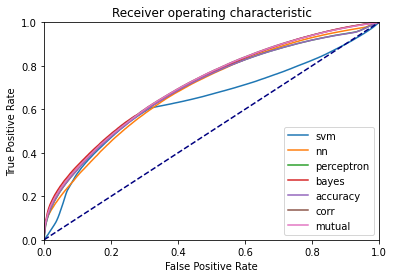

In [ ]:

try:
  os.mkdir("Test_scores")
except:
  pass

plt.figure()
aucs = []
for n in names:
  test_scores = clfs[n].predict_probabilities(dfdc_scores)
  np.save("Test_scores/dfdc_"+n+".npy", test_scores, allow_pickle=True, fix_imports=True)
  fpr, tpr, thr = roc_curve(np.array(dfdc_test_labels), np.array(test_scores))
  aucs.append(auc(fpr, tpr))
  plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0001])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(names, loc="lower right")
plt.show()

In [ ]:
svm = np.load("/content/Test_scores/dfdc_svm.npy")
nn = np.load("/content/Test_scores/dfdc_nn.npy")
perceptron = np.load("/content/Test_scores/dfdc_perceptron.npy")
bayes_par = np.load("/content/Test_scores/dfdc_bayes.npy")
accuracy = np.load("/content/Test_scores/dfdc_accuracy.npy")
corr = np.load("/content/Test_scores/dfdc_corr.npy")
mutual = np.load("/content/Test_scores/dfdc_mutual.npy")
tot_names = models_names + names

In [ ]:
new_models = [svm,nn,perceptron, bayes_par, accuracy, corr, mutual]
dfdc_scores_new = np.transpose(dfdc_scores).tolist()
for el in new_models:
  dfdc_scores_new.append(el)
dfdc_scores_new = np.transpose(dfdc_scores_new)

In [ ]:
for row in range(dfdc_scores_new.shape[0]):
  true_label =  dfdc_test_labels[row]
  for idx in range(6):
    for el in range(6,18):
      if true_label >= 0.5 and dfdc_scores_new[row][el]>=0.5 and dfdc_scores_new[row][idx]<0.5:

        print("---------------------------")
        print("el: ", tot_names[el])
        print("true label ",true_label)
        for i in range(len(tot_names)):
          print(tot_names[i] + ": " + str(dfdc_scores_new[row][i]))


---------------------------
el:  Max
true label  1
EfficientNetAutoAttB4: 0.24185860750075988
EfficientNetAutoAttB4ST: 0.5281236205269376
EfficientNetB4: 0.09777934186914299
EfficientNetB4ST: 0.13983216998834228
Resnet: 0.197
Xception: 0.11
Avg: 0.02781281148619077
Bayes: 0.15310813789757394
Prod: 0.055370371722033296
Max: 0.7404010705473554
Min: 0.2198579160068409
svm: 0.2225127538058309
nn: 0.2244523030187521


IndexError: ignored

In [ ]:
np.save("Test_scores/dfdc_labels.npy", dfdc_test_labels, allow_pickle=True, fix_imports=True)

In [ ]:
for idx, n in enumerate(names):
  print(n+": "+str(aucs[idx]))

## Quantitative Performance

In [ ]:
from numpy import std, mean, sqrt
def compute_accuracy(test_labels, test_scores, thr=0.5):
  labels = np.array(test_labels).tolist()
  scores = np.array(test_scores).tolist()
  N = len(labels)
  accuracy = 0
  for idx in range(N):
    if (test_labels[idx] == 1 and test_scores[idx] >= thr) or (test_labels[idx] == 0 and test_scores[idx] < thr):
      accuracy += 1
  return accuracy/N

def compute_eer(fpr, tpr):
  min_diff = 1.1
  min_idx = 0
  N = len(fpr)
  for idx in range(N):
    if min_diff > abs(fpr[idx]-(1-tpr[idx])):
      min_diff = abs(fpr[idx]-(1-tpr[idx]))
      min_idx = idx
  return (fpr[min_idx]+1-tpr[min_idx])/2

def compute_fpr_at_fnr(fpr, tpr, at_fnr=0.01):
  N = len(fpr)
  for idx in range(N):
    if 1-tpr[idx] <= 0.01:
      return fpr[idx]
  return 1

def compute_fnr_at_fpr(fpr, tpr, at_fpr=0.01):
  N = len(fpr)
  for idx in range(N):
    if fpr[N-1-idx] <= 0.01:
      return 1-tpr[N-1-idx]
  return 1

def distributions(labels, scores):
  labels = np.array(labels).tolist()
  scores = np.array(scores).tolist()
  N = len(labels)
  live = []
  fake = []
  for idx in range(N):
    if labels[idx] == 1:
      fake.append(scores[idx])
    else:
      live.append(scores[idx])
  return live, fake

def compute_cohen_d(test_labels, test_scores):
  live, fake = distributions(test_labels, test_scores)
  nlive = len(live)
  nfake = len(fake)
  dof = nfake+nlive-2
  return abs(mean(live)-mean(fake))/sqrt(((nlive-1)*std(live, ddof=1)**2+(nfake-1)*std(fake, ddof=1)**2)/dof)

### Intra-dataset

Fitted on Training set of FF++, evaluated on Test set of FF++

In [ ]:
aucs = []
accs = []
eers = []
ds = []
fpr_fnr001s = []
fnr_fpr001s = []
for n in names:
  test_scores = clfs[n].predict_probabilities(ff_scores)
  fpr, tpr, thr = roc_curve(np.array(test_labels), np.array(test_scores))
  ds.append(compute_cohen_d(test_labels, test_scores))
  eers.append(compute_eer(fpr, tpr))
  aucs.append(auc(fpr, tpr))
  accs.append(compute_accuracy(test_labels, test_scores))
  fpr_fnr001s.append(compute_fpr_at_fnr(fpr, tpr))
  fnr_fpr001s.append(compute_fnr_at_fpr(fpr, tpr))

In [ ]:
class_names = ["svm        ", "nn         ", "perceptron ", "bayes      ",
               "accuracy   ", "correlation", "mutual     "]
print("               auc    acc(0.5)     eer    Cohen's d fpr@fnr1% fnr@fpr1%")
for idx, n in enumerate(class_names):
  print(n + ": " + str(round(aucs[idx], 4)) + "    " + str(round(accs[idx], 4))+"    "+str(round(eers[idx], 4))+"    "+str(round(ds[idx], 4))+"    "+str(round(fpr_fnr001s[idx], 4))+"    "+str(round(fnr_fpr001s[idx], 4)))

### Cross-dataset:

Fitted on Training set of FF++, evaluated on Test set of DFDC

In [ ]:
aucs = []
accs = []
eers = []
fpr_fnr001s = []
fnr_fpr001s = []
ds = []
for n in names:
  test_scores = clfs[n].predict_probabilities(dfdc_scores)
  fpr, tpr, thr = roc_curve(np.array(dfdc_test_labels), np.array(test_scores))
  ds.append(compute_cohen_d(dfdc_test_labels, test_scores))
  eers.append(compute_eer(fpr, tpr))
  aucs.append(auc(fpr, tpr))
  accs.append(compute_accuracy(dfdc_test_labels, test_scores))
  fpr_fnr001s.append(compute_fpr_at_fnr(fpr, tpr))
  fnr_fpr001s.append(compute_fnr_at_fpr(fpr, tpr))

In [ ]:
class_names = ["svm        ", "nn         ", "perceptron ", "bayes      ",
               "accuracy   ", "correlation", "mutual     "]
print("               auc    acc(0.5)     eer    Cohen's d fpr@fnr1% fnr@fpr1%")
for idx, n in enumerate(class_names):
  print(n + ": " + str(round(aucs[idx], 4)) + "    " + str(round(accs[idx], 4))+"    "+str(round(eers[idx], 4))+"    "+str(round(ds[idx], 4))+"    "+str(round(fpr_fnr001s[idx], 4))+"    "+str(round(fnr_fpr001s[idx], 4)))

In [ ]:
!zip -r /content/Test_scores.zip /content/Test_scores

  adding: content/Test_scores/ (stored 0%)
  adding: content/Test_scores/dfdc_corr.npy (deflated 6%)
  adding: content/Test_scores/dfdc_nn.npy (deflated 6%)
  adding: content/Test_scores/ff_accuracy.npy (deflated 7%)
  adding: content/Test_scores/ff_perceptron.npy (deflated 13%)
  adding: content/Test_scores/dfdc_labels.npy (deflated 100%)
  adding: content/Test_scores/dfdc_mutual.npy (deflated 6%)
  adding: content/Test_scores/dfdc_perceptron.npy (deflated 7%)
  adding: content/Test_scores/dfdc_svm.npy (deflated 7%)
  adding: content/Test_scores/ff_labels.npy (deflated 100%)
  adding: content/Test_scores/ff_corr.npy (deflated 7%)
  adding: content/Test_scores/dfdc_accuracy.npy (deflated 6%)
  adding: content/Test_scores/dfdc_bayes.npy (deflated 6%)
  adding: content/Test_scores/ff_mutual.npy (deflated 7%)
  adding: content/Test_scores/ff_nn.npy (deflated 14%)
  adding: content/Test_scores/ff_svm.npy (deflated 13%)
  adding: content/Test_scores/ff_bayes.npy (deflated 9%)


### Majority rule

In [ ]:
def majority_rule(scores, thr=0.5, required=None):
  scores = np.array(scores).tolist()
  N, nMod = np.shape(scores)
  if required is None:
    required = int(np.floor(nMod/2)+1)
  labels = []
  for idx in range(N):
    if sum([int(x >= thr) for x in scores[idx]]) >= required:
      labels.append(1)
    else:
      labels.append(0)
  return labels


In [ ]:
for thr in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
  print(thr)
  predicted_labels = majority_rule(ff_scores, thr)
  N = len(predicted_labels)
  count = 0
  for idx in range(N):
    if predicted_labels[idx] == 1 and test_labels[idx] == 1:
      count += 1
    elif predicted_labels[idx] == 0 and test_labels[idx] == 0:
      count+=1
  print("Intra: ", count/N)

  predicted_labels = majority_rule(dfdc_scores, thr)
  N = len(predicted_labels)
  count = 0
  for idx in range(N):
    if predicted_labels[idx] == 1 and dfdc_test_labels[idx] == 1:
      count += 1
    elif predicted_labels[idx] == 0 and dfdc_test_labels[idx] == 0:
      count+=1
  print("Cross: ", count/N)

0.0
Intra:  0.75
Cross:  0.8230791377953511
0.1
Intra:  0.9283482142857142
Cross:  0.6197828493189249
0.2
Intra:  0.9303013392857142
Cross:  0.5511084665732547
0.3
Intra:  0.926171875
Cross:  0.5023730461877067
0.4
Intra:  0.9203683035714286
Cross:  0.46083290146323985
0.5
Intra:  0.9135602678571428
Cross:  0.4226581444301554
0.6
Intra:  0.9017857142857143
Cross:  0.38583338131889927
0.7
Intra:  0.8858258928571429
Cross:  0.34963818883279907
0.8
Intra:  0.8580915178571429
Cross:  0.31158755446361736
0.9
Intra:  0.8014508928571429
Cross:  0.26569032035163825
1.0
Intra:  0.25
Cross:  0.17692086220464884


#### Majority rule on EER from training set

In [ ]:
def compute_eer_thr(fpr, tpr):
  min_diff = 1.1
  min_idx = 0
  N = len(fpr)
  for idx in range(N):
    if min_diff > abs(fpr[idx]-(1-tpr[idx])):
      min_diff = abs(fpr[idx]-(1-tpr[idx]))
      min_idx = idx
  return min_idx

In [ ]:
thr_eers = []
r, c = np.shape(db_scores)
for n in range(c):
  fpr, tpr, thr = roc_curve(np.array(labels), np.array(db_scores)[:, n])
  thr_eers.append(thr[compute_eer_thr(fpr, tpr)])

In [ ]:
def majority_rule_eer(scores, thr, required=None):
  scores = np.array(scores).tolist()
  N, nMod = np.shape(scores)
  if required is None:
    required = int(np.floor(nMod/2)+1)
  labels = []
  for idx in range(N):
    if sum([int(x >= thr[el]) for el, x in enumerate(scores[idx])]) >= required:
      labels.append(1)
    else:
      labels.append(0)
  return labels

In [ ]:
predicted_labels = majority_rule_eer(ff_scores, thr_eers)
N = len(predicted_labels)
count = 0
for idx in range(N):
  if predicted_labels[idx] == 1 and test_labels[idx] == 1:
    count += 1
  elif predicted_labels[idx] == 0 and test_labels[idx] == 0:
    count+=1
print("Intra: ", count/N)

predicted_labels = majority_rule_eer(dfdc_scores, thr_eers)
N = len(predicted_labels)
count = 0
for idx in range(N):
  if predicted_labels[idx] == 1 and dfdc_test_labels[idx] == 1:
    count += 1
  elif predicted_labels[idx] == 0 and dfdc_test_labels[idx] == 0:
    count+=1
print("Cross: ", count/N)

Intra:  0.9174107142857143
Cross:  0.466070366033897


In [ ]:
for req in range(7):
  print(req)
  predicted_labels = majority_rule_eer(ff_scores, thr_eers, req)
  N = len(predicted_labels)
  count = 0
  for idx in range(N):
    if predicted_labels[idx] == 1 and test_labels[idx] == 1:
      count += 1
    elif predicted_labels[idx] == 0 and test_labels[idx] == 0:
      count+=1
  print("Intra: ", count/N)

  predicted_labels = majority_rule_eer(dfdc_scores, thr_eers, req)
  N = len(predicted_labels)
  count = 0
  for idx in range(N):
    if predicted_labels[idx] == 1 and dfdc_test_labels[idx] == 1:
      count += 1
    elif predicted_labels[idx] == 0 and dfdc_test_labels[idx] == 0:
      count+=1
  print("Cross: ", count/N)

0
Intra:  0.75
Cross:  0.8230791377953511
1
Intra:  0.8151785714285714
Cross:  0.7636653294688958
2
Intra:  0.92734375
Cross:  0.61924029252001
3
Intra:  0.9280133928571429
Cross:  0.5423098332021727
4
Intra:  0.9174107142857143
Cross:  0.466070366033897
5
Intra:  0.8646763392857143
Cross:  0.33722848167271285
6
Intra:  0.5138392857142857
Cross:  0.1934598872659104


# Computational time


In [ ]:
from timeit import default_timer as timer
r, c = np.shape(ff_scores)
repetitions = 100

for n in names:
  dt = 0
  for repeat in range(repetitions):
    t0 = timer()
    _ = clfs[n].predict_probabilities(ff_scores)
    t1 = timer()
    dt += t1-t0
  print(n + ": " + str(dt/(r*repetitions)))

dt = 0
clf = max_rule()
for repeat in range(repetitions):
    t0 = timer()
    _ = clf.predict_probabilities(ff_scores)
    t1 = timer()
    dt += t1-t0
print("Max: " + str(dt/(r*repetitions)))


dt = 0
clf = min_rule()
for repeat in range(repetitions):
    t0 = timer()
    _ = clf.predict_probabilities(ff_scores)
    t1 = timer()
    dt += t1-t0
print("Min: " + str(dt/(r*repetitions)))

dt = 0
clf = prod_rule()
for repeat in range(repetitions):
    t0 = timer()
    _ = clf.predict_probabilities(ff_scores)
    t1 = timer()
    dt += t1-t0
print("Prod: " + str(dt/(r*repetitions)))

dt = 0
clf = bayes_rule()
for repeat in range(repetitions):
    t0 = timer()
    _ = clf.predict_probabilities(ff_scores)
    t1 = timer()
    dt += t1-t0
print("Bayes: " + str(dt/(r*repetitions)))

dt = 0
clf = average_rule()
for repeat in range(repetitions):
    t0 = timer()
    _ = clf.predict_probabilities(ff_scores)
    t1 = timer()
    dt += t1-t0
print("Average: " + str(dt/(r*repetitions)))


svm: 0.00013835243517968797
nn: 1.300283691405113e-06
perceptron: 6.443282790163453e-07
bayes: 5.261756573646486e-07
accuracy: 3.6162811422994727e-06
corr: 3.2656389497758604e-06
mutual: 3.608966164621411e-06
Max: 4.274770511719491e-06
Min: 4.349760457587948e-06
Prod: 4.647885783482155e-06


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:218: RuntimeWarning: invalid value encountered in double_scalars


Bayes: 1.4517109727120265e-05
Average: 7.784279097656111e-06


In [ ]:
!lscpu |grep 'Model name'
!lscpu | grep "MHz"

Model name:          AMD EPYC 7B12
CPU MHz:             2249.998


In [ ]:
!cat /proc/cpuinfo
!cat /proc/meminfo

processor	: 0
vendor_id	: AuthenticAMD
cpu family	: 23
model		: 49
model name	: AMD EPYC 7B12
stepping	: 0
microcode	: 0x1000065
cpu MHz		: 2249.998
cache size	: 512 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall nx mmxext fxsr_opt pdpe1gb rdtscp lm constant_tsc rep_good nopl nonstop_tsc cpuid extd_apicid tsc_known_freq pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm cmp_legacy cr8_legacy abm sse4a misalignsse 3dnowprefetch osvw topoext ssbd ibrs ibpb stibp vmmcall fsgsbase tsc_adjust bmi1 avx2 smep bmi2 rdseed adx smap clflushopt clwb sha_ni xsaveopt xsavec xgetbv1 clzero xsaveerptr arat npt nrip_save umip rdpid
bugs		: sysret_ss_attrs null_seg spectre_v1 spectre_v2 spec_store_bypass
bogomips	: 4499.99
TLB size	: 3072

In [ ]:
from timeit import default_timer as timer
r, c = np.shape(ff_scores)
repetitions = 100

for n_models in range(1,c+1):
  print("\n\n"+str(n_models))
  clfs = {}
  names = ['svm', 'nn', 'perceptron', 'bayes']
  for n in names:
    clf = model_fusion(n)
    clf.train(db_scores[:, 0:n_models], labels)
    clfs[n] = clf

  names.append("accuracy")
  clf = model_fusion("accuracy")
  clf.train(acc[0:n_models])
  clfs["accuracy"] = clf

  names.append("corr")
  clf = model_fusion("corr")
  clf.train(db_scores[:, 0:n_models], labels)
  clfs["corr"] = clf

  names.append("mutual")
  clf = model_fusion("mutual")
  clf.train(db_scores[:, 0:n_models], labels)
  clfs["mutual"] = clf

  for n in names:
    dt = 0
    for repeat in range(repetitions):
      t0 = timer()
      _ = clfs[n].predict_probabilities(ff_scores[:, 0:n_models])
      t1 = timer()
      dt += t1-t0
    print(n + ": " + str(dt/(r*repetitions)))

  dt = 0
  clf = max_rule()
  for repeat in range(repetitions):
      t0 = timer()
      _ = clf.predict_probabilities(ff_scores[:, 0:n_models])
      t1 = timer()
      dt += t1-t0
  print("Max: " + str(dt/(r*repetitions)))


  dt = 0
  clf = min_rule()
  for repeat in range(repetitions):
      t0 = timer()
      _ = clf.predict_probabilities(ff_scores[:, 0:n_models])
      t1 = timer()
      dt += t1-t0
  print("Min: " + str(dt/(r*repetitions)))

  dt = 0
  clf = prod_rule()
  for repeat in range(repetitions):
      t0 = timer()
      _ = clf.predict_probabilities(ff_scores[:, 0:n_models])
      t1 = timer()
      dt += t1-t0
  print("Prod: " + str(dt/(r*repetitions)))

  dt = 0
  clf = bayes_rule()
  for repeat in range(repetitions):
      t0 = timer()
      _ = clf.predict_probabilities(ff_scores[:, 0:n_models])
      t1 = timer()
      dt += t1-t0
  print("Bayes: " + str(dt/(r*repetitions)))

  dt = 0
  clf = average_rule()
  for repeat in range(repetitions):
      t0 = timer()
      _ = clf.predict_probabilities(ff_scores[:, 0:n_models])
      t1 = timer()
      dt += t1-t0
  print("Average: " + str(dt/(r*repetitions)))




1
svm: 0.0002372465245234342
nn: 1.3469778872752564e-06
perceptron: 4.590648755556767e-07
bayes: 4.898465061415891e-07
accuracy: 1.3638341774487068e-06
corr: 1.2998203152869385e-06
mutual: 1.3574629882821146e-06
Max: 4.256418214283591e-06
Min: 4.2984760797974025e-06
Prod: 4.62586764453578e-06
Bayes: 1.2499821818641368e-05
Average: 7.91224217577329e-06


2
svm: 0.00020497458702232053
nn: 1.1795694207573806e-06
perceptron: 6.132143141722883e-07
bayes: 5.278893655185714e-07
accuracy: 1.8225585842697813e-06
corr: 1.6928469536899067e-06
mutual: 1.8283006378285092e-06
Max: 4.280296810827216e-06
Min: 4.344289282922123e-06
Prod: 4.7005845005644785e-06
Bayes: 1.3148920696430366e-05
Average: 7.872421554694142e-06


3
svm: 0.00019004254682253725
nn: 1.2062522092668765e-06
perceptron: 6.253034972100328e-07
bayes: 5.237988337053626e-07
accuracy: 2.2585909659592775e-06
corr: 2.056318683590876e-06
mutual: 2.2551541880610718e-06
Max: 4.2901810758887596e-06
Min: 4.333451135045558e-06
Prod: 4.70118451

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:218: RuntimeWarning: invalid value encountered in double_scalars


Bayes: 1.4649134373323745e-05
Average: 8.13165658090347e-06
